In [52]:
%matplotlib inline
import cv2
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms import transforms
import matplotlib.pyplot as plt

# Checks the version of PyTorch and torchvision
print("PyTorch version: ",torch.__version__)
print("torchvision version: ", torchvision.__version__)

PyTorch version:  2.0.1
torchvision version:  0.15.2


# Coding Challenge 4

Load your saved CNN model weights file to the Jupyter/Colab Notebook. Make a prediction with your trained CNN model on the test image provided image_of_a_zero.png. The test image has never seen the CNN model before. Did the CNN model classify the image to class 0 correctly?

# 1. PyTorch CNN Object

In [53]:
# PyTorch CNN object to define the neural netork architecture
class CNN(nn.Module):
    
    # Constructs the CNN object
    def __init__(self):
        super().__init__()
        
        # Convolutiona input layer
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=3,stride=1)
        
        # Convolutional hidden layer 1
        self.conv2 = nn.Conv2d(in_channels=6,out_channels=16,kernel_size=3,stride=1)
        
        # Fully connected hidden layer 2
        self.fc1 = nn.Linear(in_features=5*5*16,out_features=120)
        
        # Fully connected hidden layer 3
        self.fc2 = nn.Linear(in_features=120,out_features=84)
        
        # Fully connected output layer
        self.fc3 = nn.Linear(in_features=84,out_features=10)
        
    def forward(self, X):
        
        # Sequences the Convolutiona input layer
        X = F.relu(self.conv1(X))
        
        # Creats a maxpooling layer to down samples the output of the input layer
        X = F.max_pool2d(X, 2, 2)
        
        # ReLU activcation function to apply non linearity
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        
        # Flattens the two dimensional compressed images to input to
        # the first fully connected layer on the CNN model
        X = X.view(-1, 5*5*16)
        
        # ReLU activcation function to apply non linearity after
        # the calculaitns for the fully connected hidden layer 3
        X = F.relu(self.fc1(X))
        
        # Dropout regularisation by 05 or 50% of the parameters inthe layer
        X = F.dropout(X, p=0.5)
        
        # ReLU activcation function to apply non linearity after
        # the calculaitns for the fully connected hidden layer 4
        X = F.relu(self.fc2(X))
        
        # Sequences the output layer of the CNN model
        X = self.fc3(X)
        
        # Returns the output probabilty scores from the softmax
        # activation function to classify an image to a class label
        return F.log_softmax(X, dim=1)

# 2. File Paths to Load the CNN Model and Image Data

In [56]:
# Loads the trained model to the ModelANN/Model file directory
path = './CNNmodels/CNN-6-001'

# Load your own image file path here
image_path = 'image_of_a_zero.png'

In [57]:
# Prints out the loaded image PyTorch tensor to the screen
image = cv2.imread(image_path)

# Reaizes the image PyTorch tensor to 28 pixels by 28 pixels
image = cv2.resize(image, (28,28))

image

array([[[22, 22, 22],
        [10, 10, 10],
        [ 8,  8,  8],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 2,  2,  2]],

       [[10, 10, 10],
        [ 3,  3,  3],
        [ 4,  4,  4],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 3,  3,  3],
        [ 1,  1,  1],
        [ 1,  1,  1],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 3,  3,  3],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 3,  3,  3],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 9,  9,  9],
        [ 1,  1,  1],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

# 3. Display the Test Image to Check the Data

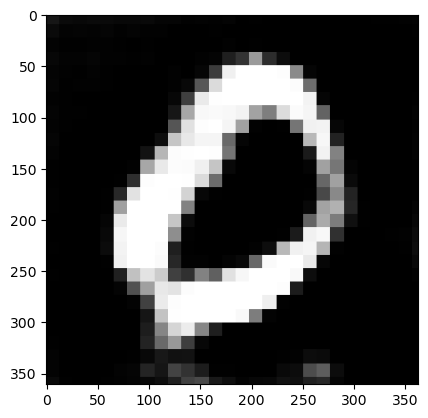

In [58]:
# Loads the generated 28 c 28 pixels MNIST image
image = cv2.imread(image_path)

# Converts the image from RGB to greyscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Displays the MNIST iamge on the screen
plt.imshow(image, cmap=plt.get_cmap('gray'))

# 4. Revaluate the Saved Model on the Test Image

In [59]:
# Python method to load the MNIST image for prediction
def image_load(image_path):

    # Read the image
    image = cv2.imread(image_path)

    # Convert BGR image to RGB image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resizes the image to 28 x 28 pixels
    image = cv2.resize(image, (28,28))

    # Define a transform to convert
    # the image to torch tensor
    transform = transforms.Compose([
        transforms.ToTensor()
    ])

    # Convert the image to Torch tensor
    tensor = transform(image)

    # Return th etensor output image ready for hte CNN
    return tensor

In [60]:
# Python method to load the CNN model to make predicitons on
def cnn_model_predictions(image_path, path):
    
    # Creates a Pytorch tensor for the loaded MNIST image
    tensor = image_load(image_path)
    
    # Loads the trained model to the ModelANN/Model file directory
    model_load = torch.load(path)
    
    # Runs the model without a gradient
    with torch.no_grad():
        new_prediction = model_load(tensor.unsqueeze(0))
    
    # Prints out the expected prediction result
    pred = new_prediction.argmax()

    # Return the predictions from the saved model
    return pred.item()

In [61]:
# Python method to load the saved model and image converted to a tensor
print('Model Prediction for Image is Class: ', cnn_model_predictions(image_path, path))

Model Prediction for Image is Class:  0


# 5. Check the Image Class Prediction on the Test Image

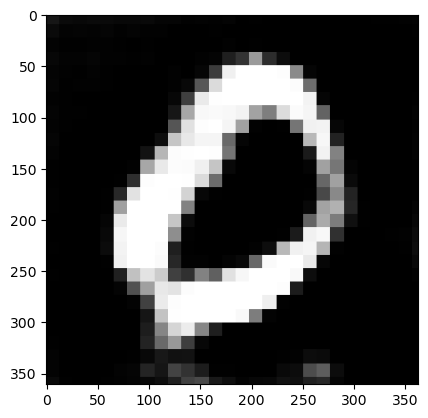

In [62]:
# Loads the generated 28 c 28 pixels MNIST image
image = cv2.imread(image_path)

# Converts the image from RGB to greyscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Displays the MNIST iamge on the screen
plt.imshow(image, cmap=plt.get_cmap('gray'))

In [63]:
# Load your own image file path here
image_path_5 = 'image_of_a_five.png'

# Extra Section

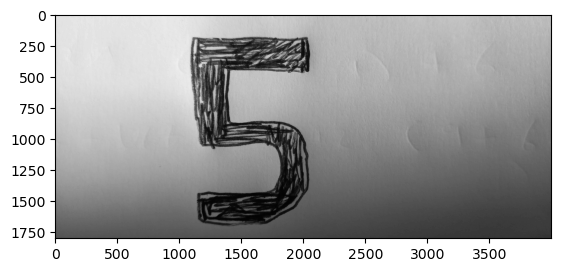

In [64]:
# Loads the generated 28 c 28 pixels MNIST image
image = cv2.imread(image_path_5)

# Converts the image from RGB to greyscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Displays the MNIST iamge on the screen
plt.imshow(image, cmap=plt.get_cmap('gray'))

In [65]:
# Python method to load the saved model and image converted to a tensor
print('Model Prediction for Image is Class: ', cnn_model_predictions(image_path_5, path))

Model Prediction for Image is Class:  4


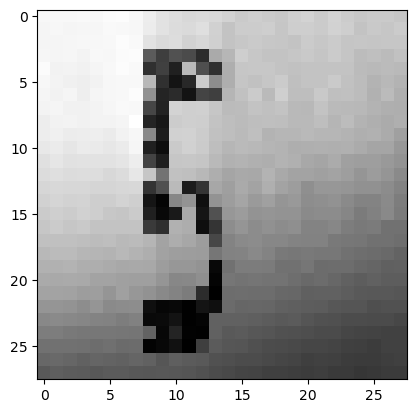

In [66]:
# Loads the generated 28 c 28 pixels MNIST image
image = cv2.imread(image_path_5)

# Converts the image from RGB to greyscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Resizes the image to 28 x 28 pixels
image = cv2.resize(image, (28,28))

# Displays the MNIST iamge on the screen
plt.imshow(image, cmap=plt.get_cmap('gray'))

In [67]:
# Displays the Python variables for hte Jupyter Notebook to the screen
%whos

Variable                Type        Data/Info
---------------------------------------------
CNN                     type        <class '__main__.CNN'>
F                       module      <module 'torch.nn.functio<...>/torch/nn/functional.py'>
cnn_model_predictions   function    <function cnn_model_predi<...>ctions at 0x7f465a437910>
cv2                     module      <module 'cv2' from '/home<...>ackages/cv2/__init__.py'>
image                   ndarray     28x28: 784 elems, type `uint8`, 784 bytes
image_load              function    <function image_load at 0x7f465a437b50>
image_path              str         image_of_a_zero.png
image_path_5            str         image_of_a_five.png
nn                      module      <module 'torch.nn' from '<...>es/torch/nn/__init__.py'>
path                    str         ./CNNmodels/CNN-6-001
plt                     module      <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
torch                   module      <module 'torch' from '/ho<...